## Object Detection - Number Plates

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

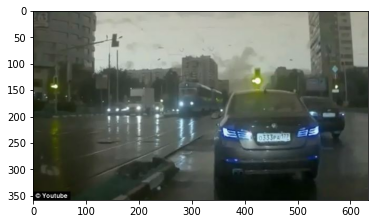

In [5]:
img = cv2.imread('DATA/car_plate.jpg')
plt.imshow(img)

In [10]:
def display(img):
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

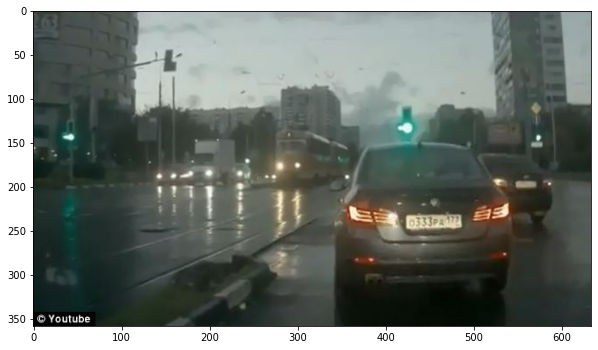

In [11]:
display(img)

## Load Cascade Russian XML FILE

In [12]:
plate_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')
plate_cascade

<CascadeClassifier 0000014A308B2B70>

In [15]:
# Function to detect the number plate

def detect_plate(img):
    
    plate_img = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for (x, y, w, h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (0,0,255), 4)
        
    return plate_img

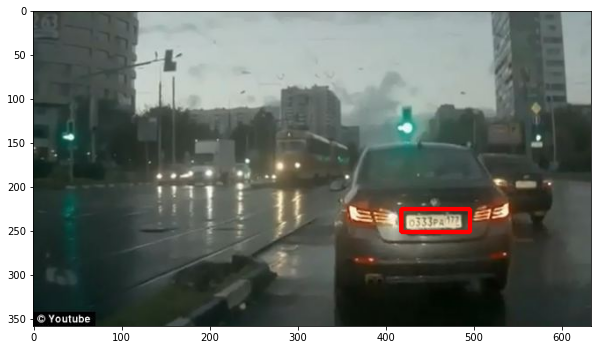

In [16]:
result = detect_plate(img)
display(result)

## Blurring the Number Plate

In [19]:
def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for (x, y, w, h) in plate_rects:
        
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 7)
        
        plate_img[y:y+h, x:x+w] = blurred_roi
        
    return plate_img

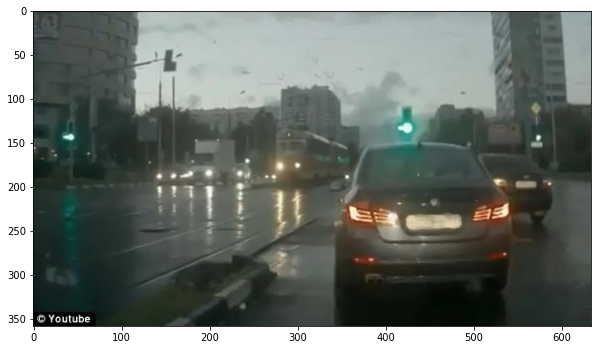

In [20]:
result = detect_and_blur_plate(img)
display(result)